In [2]:
import numpy as np

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)


# Parameters
N = 32
q_list = np.linspace(0, 30, 100)

# Basis
coord = d3.Coordinate('x')
dist = d3.Distributor(coord, dtype=np.complex128)
basis = d3.ComplexFourier(coord, N, bounds=(0, 2*np.pi))

# Fields
y = dist.Field(bases=basis)
a = dist.Field()

# Substitutions
x = dist.local_grid(basis)
q = dist.Field()
cos_2x = dist.Field(bases=basis)
cos_2x['g'] = np.cos(2 * x)
dx = lambda A: d3.Differentiate(A, coord)

In [4]:
# Problem
problem = d3.EVP([y], eigenvalue=a, namespace=locals())
problem.add_equation("dx(dx(y)) + (a - 2*q*cos_2x)*y = 0")

{'eqn': Add(Diff(Diff(<Field 140347187359184>)), Mul(Add(Convert(<Field 140347186170384>), Mul(-1, Mul(Mul(2, <Field 140346945994384>), <Field 140346906005904>))), <Field 140347187359184>)),
 'LHS': Add(Diff(Diff(<Field 140347187359184>)), Mul(Add(Convert(<Field 140347186170384>), Mul(-1, Mul(Mul(2, <Field 140346945994384>), <Field 140346906005904>))), <Field 140347187359184>)),
 'RHS': 0,
 'condition': 'True',
 'tensorsig': (),
 'dtype': dtype('complex128'),
 'valid_modes': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]),
 'M': <Field 140347187359184>,
 'L': Add(Diff(Diff(<Field 140347187359184>)), Mul(Mul(-1, Mul(Mul(2, <Field 140346945994384>), <Field 140346906005904>)), <Field 140347187359184>)),
 'domain': <dedalus.core.domain.Domain at 0x7fa5201c0910>,
 'matrix_dependence': a

In [5]:
# Solver
solver = problem.build_solver()
evals = []
for qi in q_list:
    q['g'] = qi
    solver.solve_dense(solver.subproblems[0], rebuild_matrices=True)
    sorted_evals = np.sort(solver.eigenvalues.real)
    evals.append(sorted_evals[:10])
evals = np.array(evals)

2024-11-09 07:27:05,853 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.3e+01/s
2024-11-09 07:27:05,872 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 8.4e+01/s
2024-11-09 07:27:05,885 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.0e+02/s
2024-11-09 07:27:05,899 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.1e+02/s
2024-11-09 07:27:05,910 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.2e+02/s
2024-11-09 07:27:05,922 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.2e+02/s
2024-11-09 07:27:05,934 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.2e+02/s
2024-11-09 07:27:05,945 subsystems 0/1 INFO :: Building subproblem matrices 

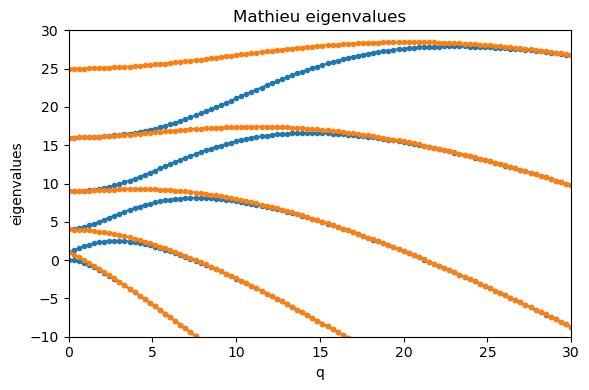

In [6]:
# Plot
fig = plt.figure(figsize=(6, 4))
plt.plot(q_list, evals[:, 0::2], '.-', c='C0')
plt.plot(q_list, evals[:, 1::2], '.-', c='C1')
plt.xlim(q_list.min(), q_list.max())
plt.ylim(-10, 30)
plt.xlabel("q")
plt.ylabel("eigenvalues")
plt.title("Mathieu eigenvalues")
plt.tight_layout()
plt.savefig("mathieu_eigenvalues.png", dpi=200)